# Predicting Handwritten Digits using Multi-Layer Perceptron (MLP)

Complete implementation using TensorFlow and Keras.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.2 MB/s eta 0:00:00


## Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Preprocessing

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

## Build MLP Model

In [4]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [15]:
history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 0.9800 - val_loss: 0.1137
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.9800 - val_loss: 0.1135
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9785 - val_loss: 0.1217
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.9808 - val_loss: 0.1153
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9991 - loss: 0.0032 - val_accuracy: 0.9797 - val_loss: 0.1239
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.9775 - val_loss: 0.1292
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9978 - loss: 0.0064 - val_accuracy: 0.9782 - val_loss: 0.1343
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.

In [20]:
model.save("mnist_mlp_model.keras")

## Evaluate Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1331
Test Accuracy: 0.9753999710083008


## Plot Accuracy and Loss

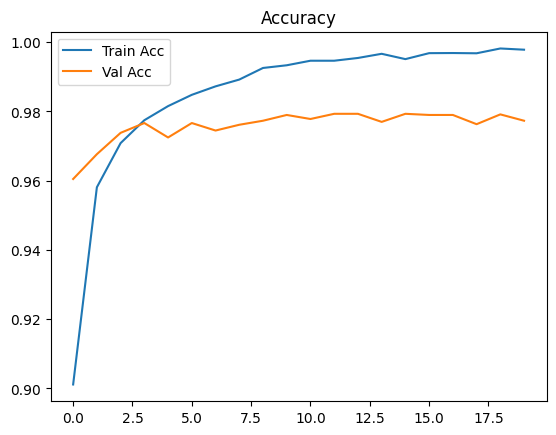

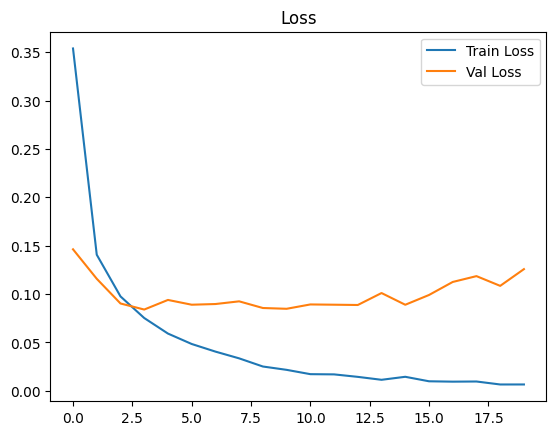

In [7]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


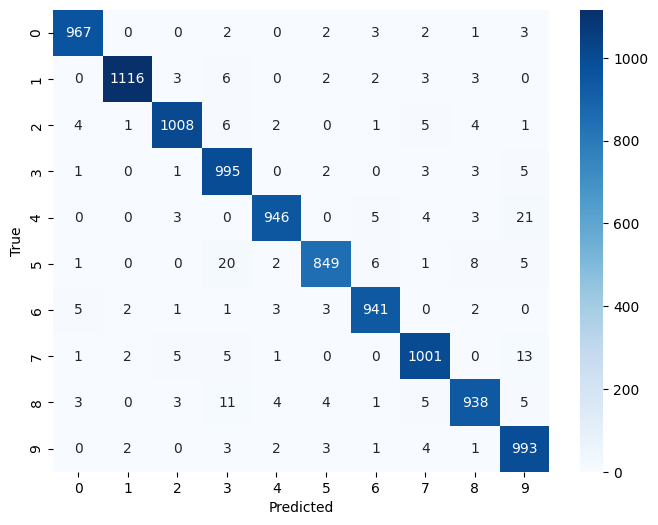

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [8]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred_classes))

# Model Comparison (MLP vs Logistic Regression vs k-NN)

## Import baseline models

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Prepare flattened data for ML models

In [11]:
X_train_flat = x_train.reshape(len(x_train), -1)
X_test_flat = x_test.reshape(len(x_test), -1)

## Logistic Regression

In [12]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flat, y_train)

y_pred_lr = log_reg.predict(X_test_flat)
lr_acc = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.9259


## k-NN Classifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat, y_train)

y_pred_knn = knn.predict(X_test_flat)
knn_acc = accuracy_score(y_test, y_pred_knn)

print("k-NN Accuracy:", knn_acc)

k-NN Accuracy: 0.9688


## Accuracy Comparison Plot

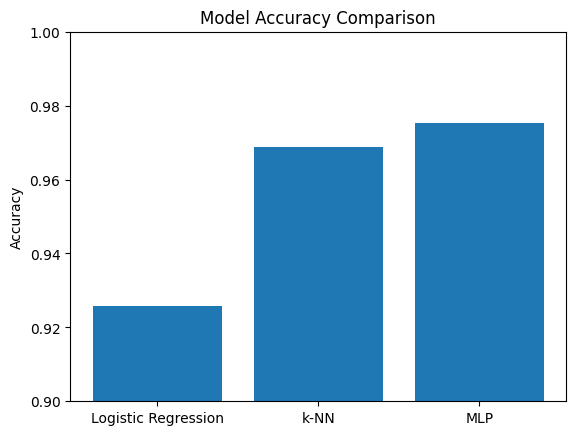

In [14]:
models = ['Logistic Regression', 'k-NN', 'MLP']
accuracies = [lr_acc, knn_acc, test_acc]

plt.figure()
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()